<a href="https://colab.research.google.com/github/tomonari-masada/courses/blob/master/SML2020/assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df0 = pd.read_csv('lifesat.csv')
df_test = df0[df0['Country'] == 'Japan']
df_train = df0[df0['Country'] != 'Japan']

In [3]:
df_train

,Country,GDP per capita,Life satisfaction
0,Russia,9054.914,6.0
1,Turkey,9437.372,5.6
2,Hungary,12239.894,4.9
3,Poland,12495.334,5.8
4,Slovak Republic,15991.736,6.1
5,Estonia,17288.083,5.6
6,Greece,18064.288,4.8
7,Portugal,19121.592,5.1
8,Slovenia,20732.482,5.7
9,Spain,25864.721,6.5


In [4]:
reg = LinearRegression()
reg.fit(df_train[['GDP per capita']], df_train['Life satisfaction'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
print('coefficient: {} ; intercept: {}'.format(reg.coef_, reg.intercept_))

coefficient: [4.90297537e-05] ; intercept: 4.875509659207955


In [6]:
test_pred = reg.predict(df_test[['GDP per capita']])

In [7]:
print('test prediction: {}'.format(test_pred))

test prediction: [6.46826793]


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

true_answer = df_test['Life satisfaction']
print('MAE: {}'.format(mean_absolute_error(true_answer, test_pred)))
print('RMSE: {}'.format(mean_squared_error(true_answer, test_pred, squared=False)))

MAE: 0.5682679284252536
RMSE: 0.5682679284252536


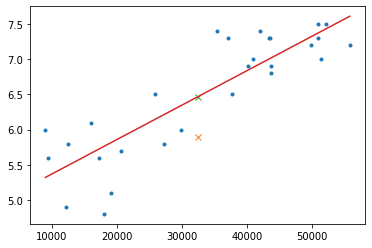

In [9]:
x = np.linspace(df_train['GDP per capita'].min(), df_train['GDP per capita'].max(), 101)
y = reg.predict(x.reshape(-1,1))
plt.plot(df_train['GDP per capita'], df_train['Life satisfaction'], '.')
plt.plot(df_test['GDP per capita'], df_test['Life satisfaction'], 'x')
plt.plot(df_test['GDP per capita'], test_pred, 'x')
plt.plot(x, y)